In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
plane_data = pd.read_csv('/content/drive/MyDrive/vdd/lab2/data/airplane_crashes_dataset_since_1908 - airplane_crashes_dataset_since_1908.csv')
plane_data.head(10)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"July 12, 1912",630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [17]:
plane_data.replace('?', np.nan)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,"June 10, 2021",800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,NaN,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
10012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10013,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,NaN,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."
10014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def format_time(val):
  neo_val = ''
  for c in val:
    if c.isdigit():
      neo_val = neo_val + c
  

  val_format = int(neo_val) if val != '' else None
  
  if val_format >= 600 and val_format <= 1759:
    return 'dia'
  else: return 'noite'

def format_date(val):
  date_format = val.split(', ')[1]
  return date_format[:3] + '0'



In [19]:
used_data = plane_data[['date', 'time']]
used_data.replace('?', np.nan,inplace = True)
used_data.dropna(inplace = True)
used_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,time
1,"September 17, 1908",1718
5,"July 12, 1912",630
9,"September 09, 1913",1830
11,"October 17, 1913",1030
13,"March 05, 1915",100


In [20]:
used_data['dn'] = used_data['time'].apply(format_time)
used_data['decada'] = used_data['date'].apply(format_date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
used_data.head()

,date,time,dn,decada
1,"September 17, 1908",1718,dia,1900
5,"July 12, 1912",630,dia,1910
9,"September 09, 1913",1830,noite,1910
11,"October 17, 1913",1030,dia,1910
13,"March 05, 1915",100,noite,1910


In [22]:
dia = used_data[used_data['dn']=='dia']
noite = used_data[used_data['dn']=='noite']

In [23]:
dia.head()

,date,time,dn,decada
1,"September 17, 1908",1718,dia,1900
5,"July 12, 1912",630,dia,1910
11,"October 17, 1913",1030,dia,1910
15,"September 03, 1915",1520,dia,1910
33,"June 14, 1917",845,dia,1910


In [24]:
noite.head()

,date,time,dn,decada
9,"September 09, 1913",1830,noite,1910
13,"March 05, 1915",100,noite,1910
19,"September 24, 1916",100,noite,1910
21,"October 01, 1916",2345,noite,1910
25,"November 28, 1916",2345,noite,1910


In [25]:
dia_list = list(dia.groupby('decada').count()['dn'])
noite_list =  [0] + list(noite.groupby('decada').count()['dn'])

['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']


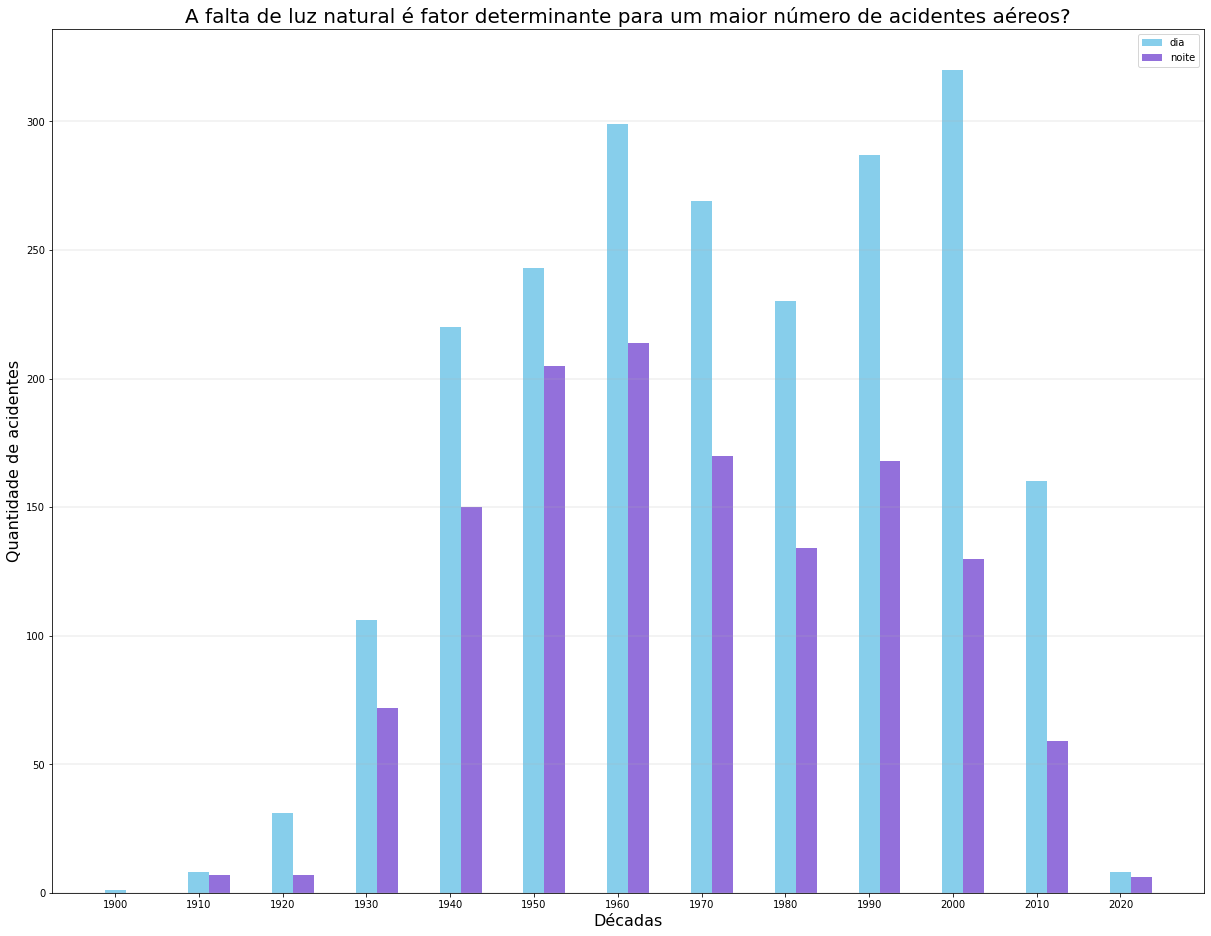

In [31]:
data = [dia_list,
noite_list]



X = np.arange(len(dia_list))
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0,0,1,1])


ax.bar(X + 0.00, data[0], color = 'skyblue', width = 0.25, label = 'dia')
ax.bar(X + 0.25, data[1], color = 'mediumpurple', width = 0.25, label = 'noite')
decadas = list(used_data['decada'].unique())
print(decadas)
plt.legend()

plt.xticks([i  for i in range(len(decadas))], decadas)

plt.ylabel("Quantidade de acidentes", fontdict={"fontsize": "16", "fontweight" : "6"})
plt.xlabel("Décadas", fontdict={"fontsize": "16", "fontweight" : "6"})
plt.title("A falta de luz natural é fator determinante para um maior número de acidentes aéreos?", fontdict={"fontsize": "20", "fontweight" : "6"})
plt.grid(axis='y', linewidth=0.3)